In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Step 1: Download BTC data
ticker = "BTC-USD"
btc_data = yf.download(ticker, period="max")
btc_data = btc_data[['Close']].dropna()

# Step 2: Define training and test sets
train_size = int(len(btc_data) * 0.8)
train, test = btc_data[0:train_size], btc_data[train_size:]

# Step 3: Define a time series split
tscv = TimeSeriesSplit(n_splits=5)

# Step 4: Define parameter ranges for Grid Search
param_grid = {
    'order': [(p, 1, q) for p in range(0, 3) for q in range(0, 3)],
    'seasonal_order': [(P, 1, Q, 12) for P in range(0, 3) for Q in range(0, 3)],
}

best_score, best_params = float("inf"), None
max_errors = 5  # Maximum consecutive errors allowed
consecutive_errors = 0
max_iterations = len(param_grid['order']) * len(param_grid['seasonal_order'])
iteration_count = 0

# Step 5: Grid Search for best parameters
for order in param_grid['order']:
    for seasonal_order in param_grid['seasonal_order']:
        iteration_count += 1
        if iteration_count > max_iterations:
            print("Reached maximum iterations. Exiting loop.")
            break
        
        try:
            # Initialize a list to hold errors for cross-validation
            cv_errors = []

            # Walk-forward validation
            for train_index, test_index in tscv.split(train):
                train_cv, test_cv = train.iloc[train_index], train.iloc[test_index]
                model_cv = SARIMAX(train_cv, order=order, seasonal_order=seasonal_order)
                model_fit_cv = model_cv.fit(disp=False)

                predictions = model_fit_cv.forecast(steps=len(test_cv))
                error = mean_squared_error(test_cv, predictions)
                cv_errors.append(error)

            # Average the cross-validation errors
            mean_cv_error = np.mean(cv_errors)

            # Check if current model is better
            if mean_cv_error < best_score:
                best_score = mean_cv_error
                best_params = (order, seasonal_order)
                consecutive_errors = 0  # Reset counter on success

        except Exception as e:
            print(f"Error for order {order} and seasonal order {seasonal_order}: {e}")
            consecutive_errors += 1
            if consecutive_errors >= max_errors:
                print("Too many consecutive errors. Exiting loop.")
                break

# Final output
print("Best Params:", best_params)
print("Best Score (Mean CV MSE):", best_score)


[*********************100%***********************]  1 of 1 completed
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

Error for order (1, 1, 1) and seasonal order (1, 1, 2, 12): LU decomposition error.


c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

Error for order (1, 1, 1) and seasonal order (2, 1, 2, 12): LU decomposition error.


c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init

KeyboardInterrupt: 

[*********************100%***********************]  1 of 1 completed
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\2014\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2940
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -23753.622
Date:                            Tue, 08 Oct 2024   AIC                          47517.245
Time:                                    15:37:02   BIC                          47547.153
Sample:                                09-17-2014   HQIC                         47528.016
                                     - 10-04-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      5.471     -0.183      0.855     -11.724       9.724
ma.L1          0.9999      5.523   

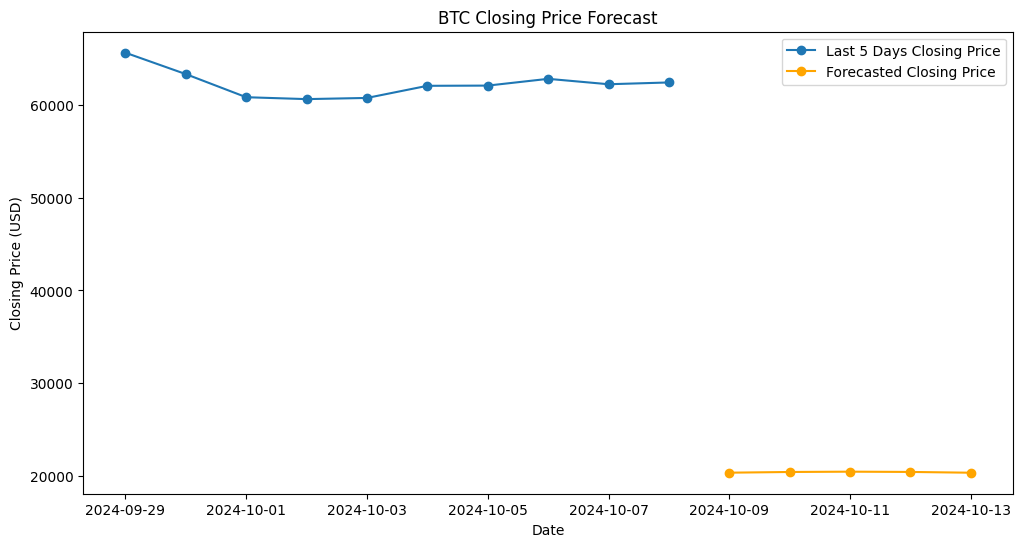

Last 5 Days Closing Prices:
 Date
2024-10-04    62067.476562
2024-10-05    62089.949219
2024-10-06    62818.953125
2024-10-07    62236.660156
2024-10-08    62429.375000
Name: Close, dtype: float64
Forecasted Closing Prices:
 2024-10-09    20347.826234
2024-10-10    20423.911878
2024-10-11    20457.214124
2024-10-12    20428.528083
2024-10-13    20343.808264
Freq: D, Name: predicted_mean, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Step 1: Download Fresh BTC Data
ticker = "BTC-USD"
btc_data = yf.download(ticker, period="max")

# Step 2: Preprocess the Data
btc_data = btc_data[['Close']].dropna()  # Keep only the 'Close' column

# Step 3: Train-Test Split
train_size = int(len(btc_data) * 0.8)
train, test = btc_data[0:train_size], btc_data[train_size:]

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 4: Fit the SARIMA model (considering seasonality)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust as needed
model_fit = model.fit()

# Check model summary
print(model_fit.summary())

# Step 5: Forecast the next 5 days
forecast = model_fit.get_forecast(steps=5)
forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=5)
forecast_series = forecast.predicted_mean
forecast_series.index = forecast_index

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index[-10:], btc_data['Close'].tail(10), label='Last 5 Days Closing Price', marker='o')
plt.plot(forecast_series.index, forecast_series, label='Forecasted Closing Price', marker='o', color='orange')
plt.title('BTC Closing Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

# Displaying the values
print("Last 5 Days Closing Prices:\n", btc_data['Close'].tail(5))
print("Forecasted Closing Prices:\n", forecast_series)

